In [1]:
from tifffile import imread
import matplotlib.pyplot as plt
import numpy as np

In [3]:
phc_good_path = "../data/p000c000.tif"
fluor_good_path = "../data/p000c001.tif"
phc_bubble_path = "../data/p016c000.tif"
fluor_bubble_path = "../data/p016c001.tif"

phc_good = imread(phc_good_path)
fluor_good = imread(fluor_good_path)
phc_bubble = imread(phc_bubble_path)
fluor_bubble = imread(fluor_bubble_path)

In [ ]:
phc_good.shape, phc_good.dtype, phc_good.nbytes/1e9

((181, 2044, 2048), dtype('uint16'), 1.515372544)

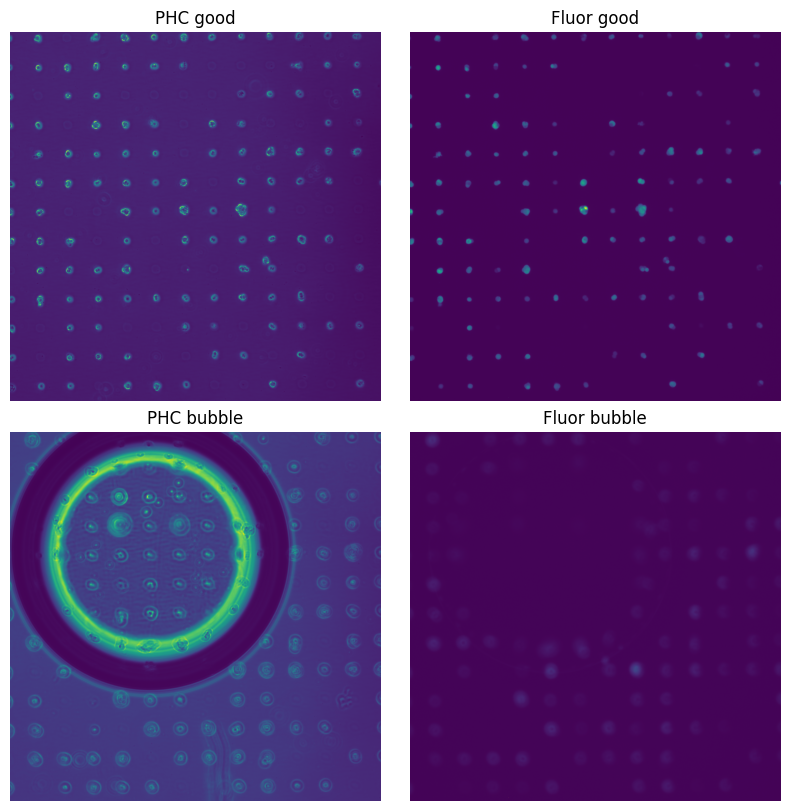

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8), constrained_layout=True)
axs[0, 0].imshow(phc_good[100])
axs[0, 0].set_title('PHC good')
axs[0, 1].imshow(fluor_good[100])
axs[0, 1].set_title('Fluor good')
axs[1, 0].imshow(phc_bubble[100])
axs[1, 0].set_title('PHC bubble' )
axs[1, 1].imshow(fluor_bubble[100])
axs[1, 1].set_title('Fluor bubble')
for ax in axs.flat:
    ax.axis('off')
plt.show()

In [6]:
from pyama_core.processing.segmentation import segment

In [21]:
def progress_callback(current, total, message):
    if current % 30 == 0:
        print(f"{message}: {current}/{total}")

In [22]:
seg_good = np.empty_like(phc_good, dtype=bool)
segment(phc_good, seg_good, progress_callback)

Segmentation: 0/181
Segmentation: 30/181
Segmentation: 60/181
Segmentation: 90/181
Segmentation: 120/181
Segmentation: 150/181
Segmentation: 180/181


In [23]:
seg_good.shape, seg_good.dtype, seg_good.nbytes/1e9

((181, 2044, 2048), dtype('bool'), 0.757686272)

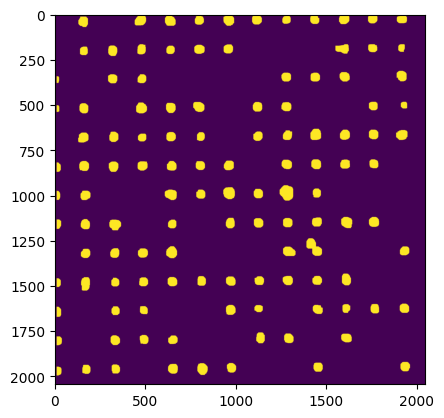

In [24]:
plt.imshow(seg_good[100])
plt.show()

In [25]:
from pyama_core.processing.background import correct

In [26]:
corrected_good = np.empty_like(fluor_good, dtype=np.float32)
correct(fluor_good, seg_good, corrected_good, progress_callback)

Background correction: 0/181
Background correction: 30/181
Background correction: 60/181
Background correction: 90/181
Background correction: 120/181
Background correction: 150/181
Background correction: 180/181


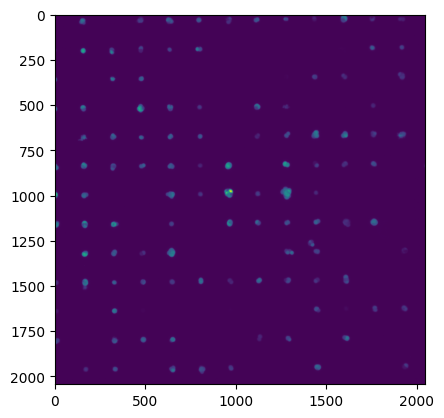

In [30]:
plt.imshow(corrected_good[100])
plt.show()

In [28]:
corrected_good.shape, corrected_good.dtype, corrected_good.nbytes/1e9

((181, 2044, 2048), dtype('float32'), 3.030745088)